In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
from sklearn.preprocessing import RobustScaler
import joblib

In [2]:
#import dataset needed
df = pd.read_excel("/content/drive/MyDrive/Crop_recommendation_DATASET.xlsx")

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
#Perform EDA on the dataset
df.isnull().any()

N              False
P              False
K              False
temperature    False
humidity       False
ph             False
rainfall       False
label          False
dtype: bool

In [5]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [6]:
#Check for datatypes

df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [7]:
df["Dew_point"] = df["temperature"]-((100-df["humidity"])/5)

In [8]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

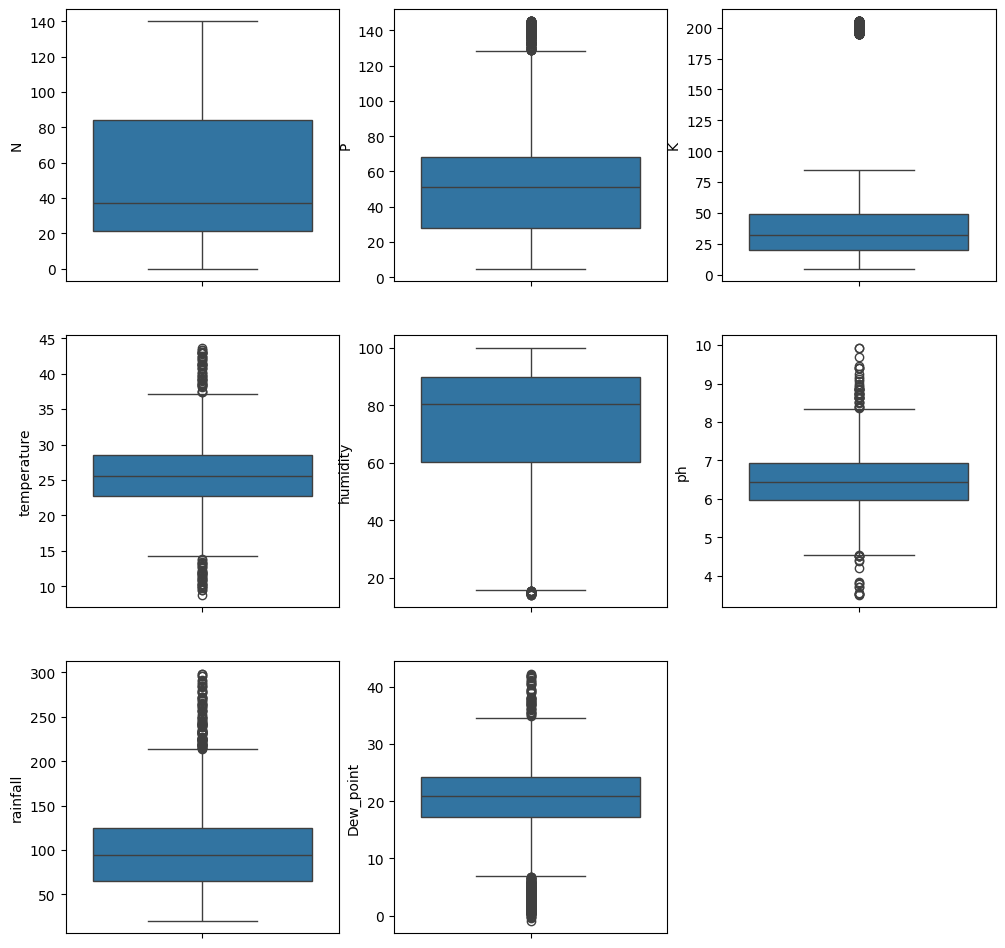

In [9]:

plt.figure(figsize=(12,12))
i=1
for col in df.drop("label", axis =1):
    plt.subplot(3,3,i)
    sns.boxplot(df[col])
    i+=1

#They contain no outliers

In [10]:
X=df.drop("label",axis = 1)
y=df["label"]

In [11]:
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25)

In [12]:
Rbs = RobustScaler()
X_train = Rbs.fit_transform(X_train)
X_test = Rbs.transform(X_test)

In [13]:
rf = RandomForestClassifier(n_estimators = 100, random_state =0)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [14]:
y_pred = rf.predict(X_test)

In [15]:
f1_score(y_test, y_pred, average ="micro")

0.9945454545454545

In [16]:
precision_score(y_test,y_pred,average ="micro")

0.9945454545454545

In [17]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 13.4 MB/s eta 0:00:00


In [18]:
import shap
explainer = shap.TreeExplainer(rf)

In [19]:
shap_values=explainer.shap_values(X)

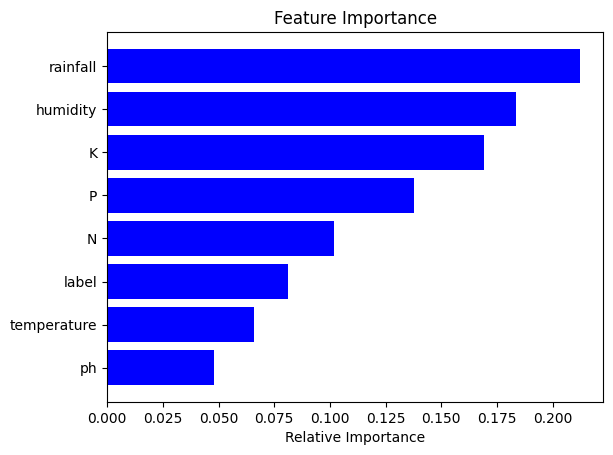

In [20]:
importances = rf.feature_importances_
indices = np.argsort(importances)
features = df.columns
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')

plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

SHAP values shape: (2200, 8, 22)
Class 0 SHAP values shape: (2200, 8)


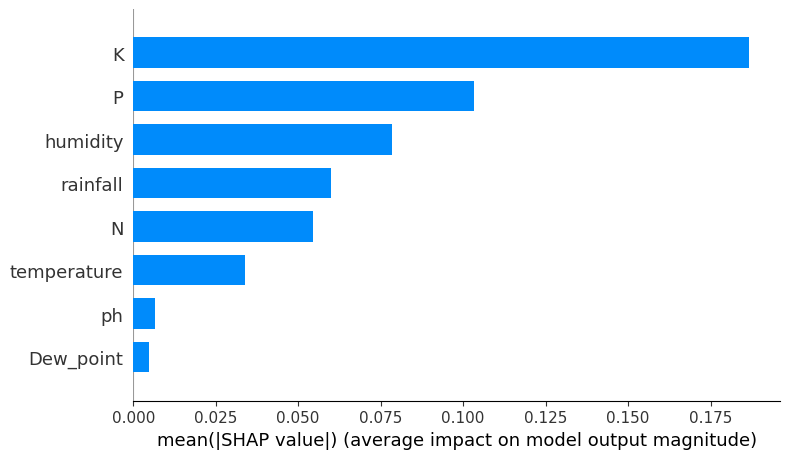

Class 1 SHAP values shape: (2200, 8)


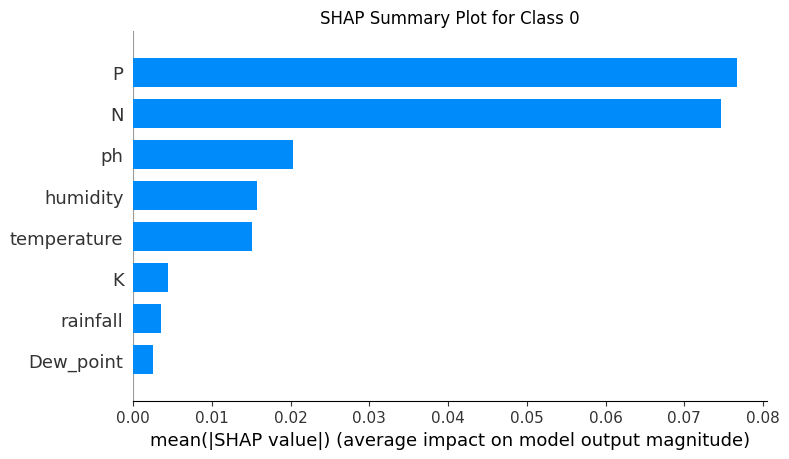

Class 2 SHAP values shape: (2200, 8)


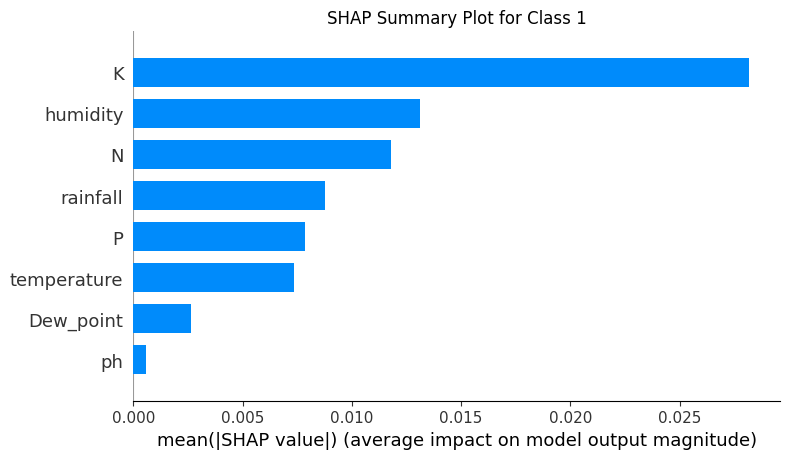

Class 3 SHAP values shape: (2200, 8)


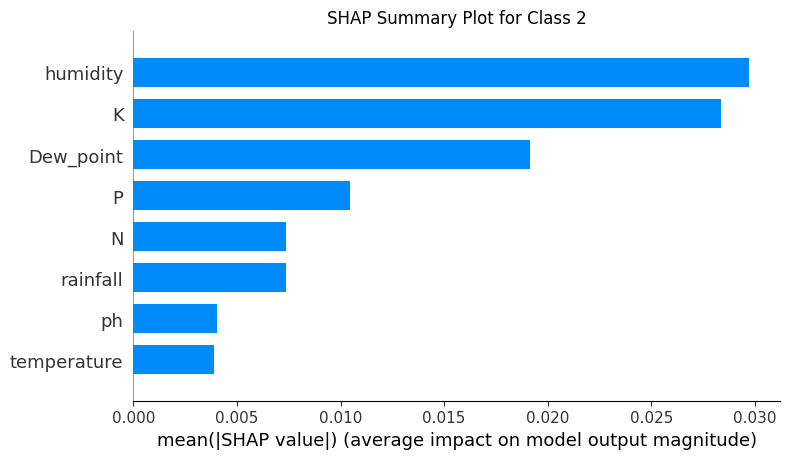

Class 4 SHAP values shape: (2200, 8)


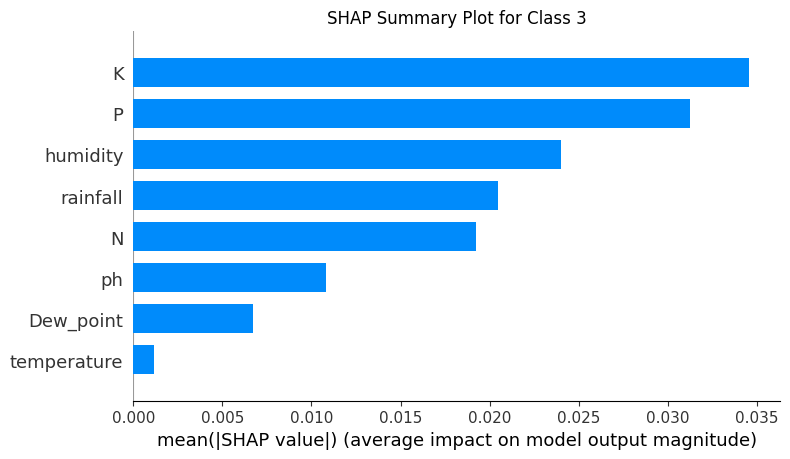

Class 5 SHAP values shape: (2200, 8)


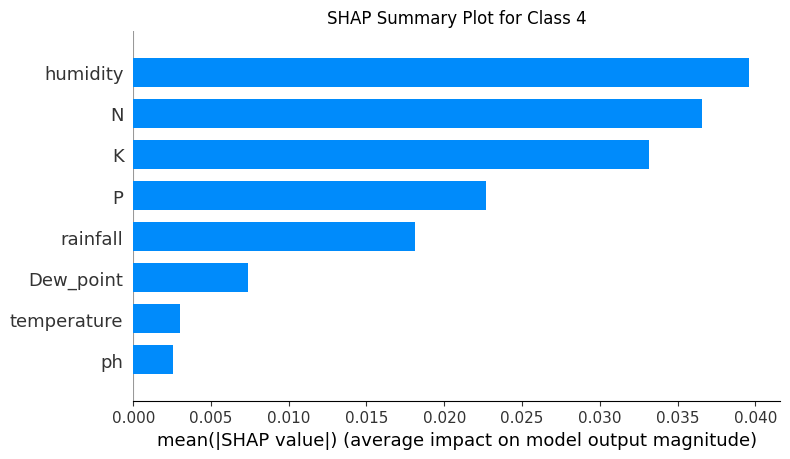

Class 6 SHAP values shape: (2200, 8)


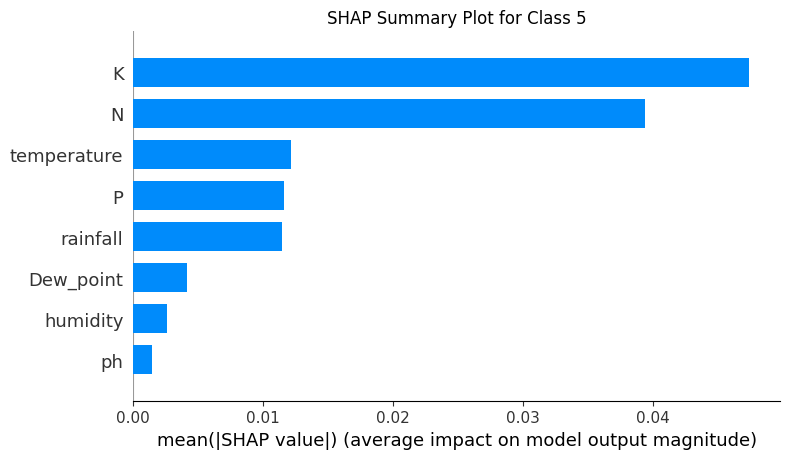

Class 7 SHAP values shape: (2200, 8)


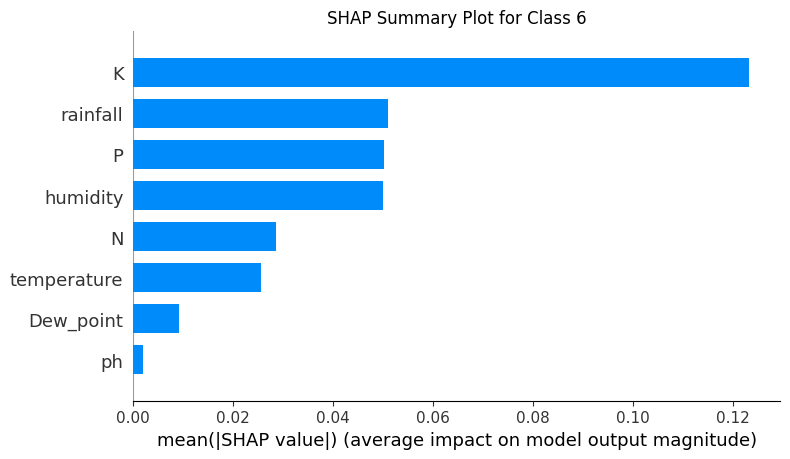

Class 8 SHAP values shape: (2200, 8)


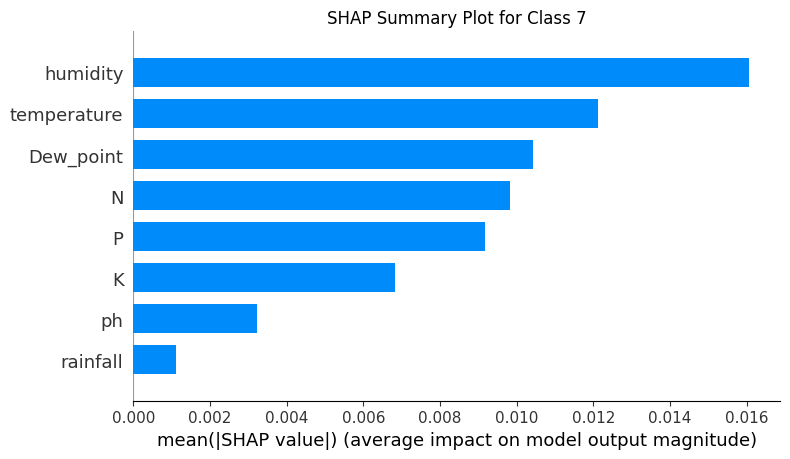

Class 9 SHAP values shape: (2200, 8)


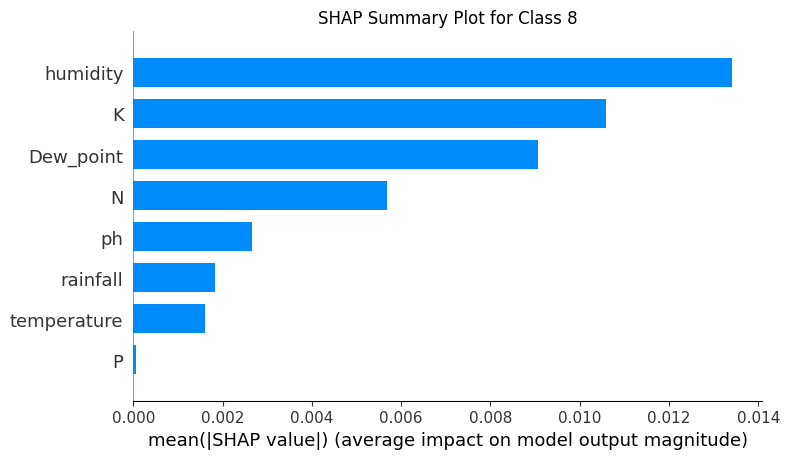

Class 10 SHAP values shape: (2200, 8)


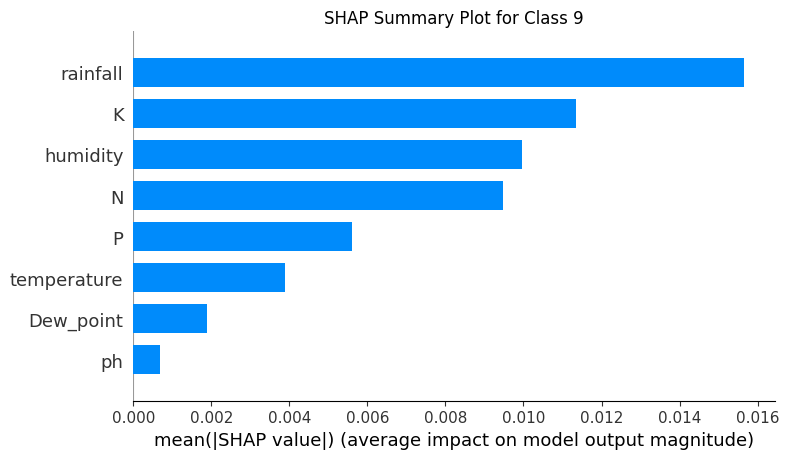

Class 11 SHAP values shape: (2200, 8)


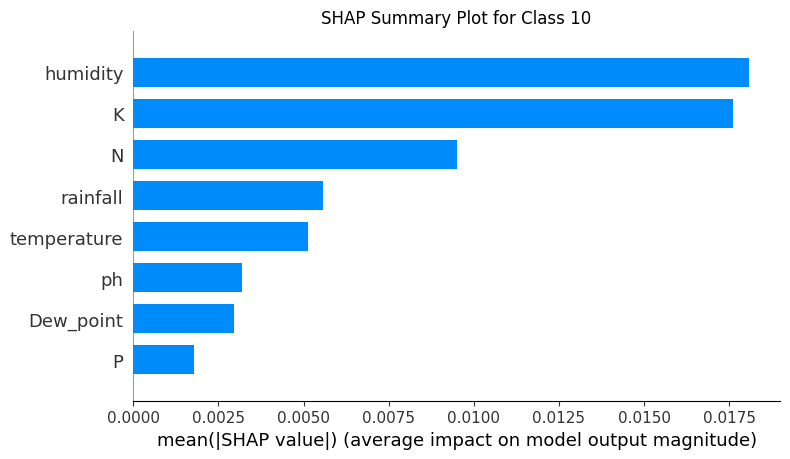

Class 12 SHAP values shape: (2200, 8)


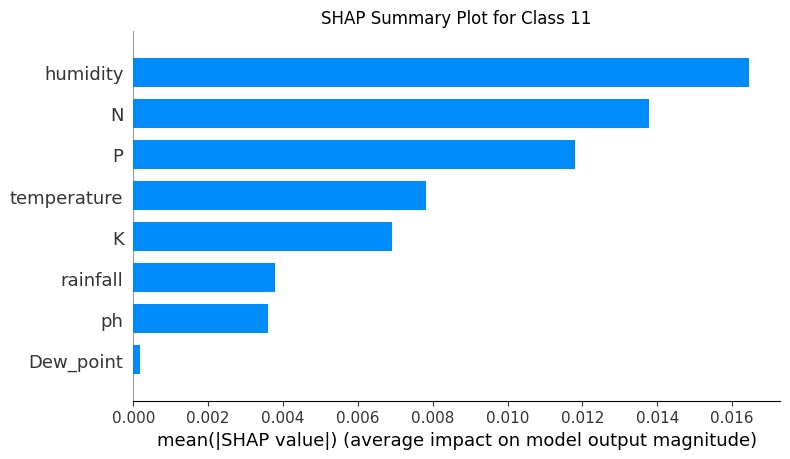

Class 13 SHAP values shape: (2200, 8)


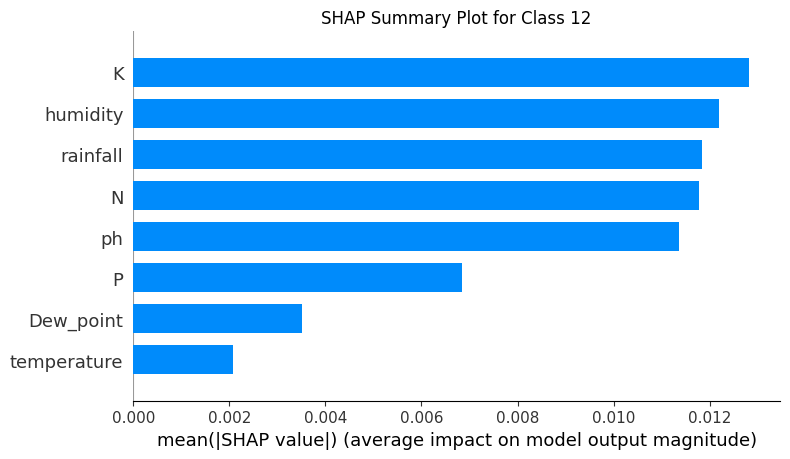

Class 14 SHAP values shape: (2200, 8)


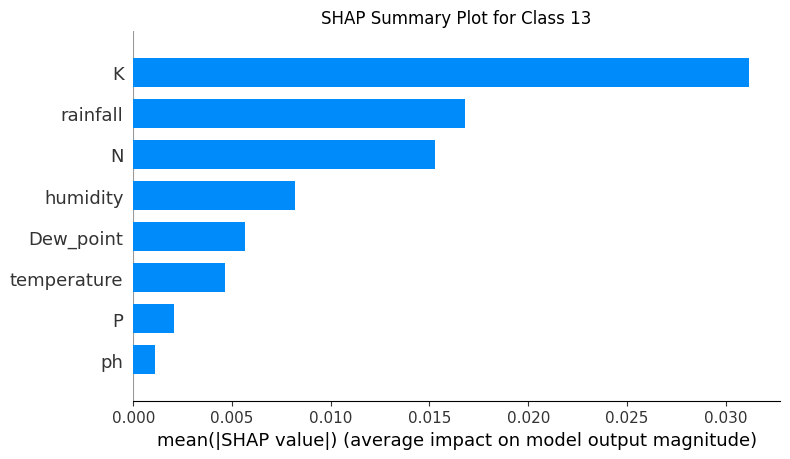

Class 15 SHAP values shape: (2200, 8)


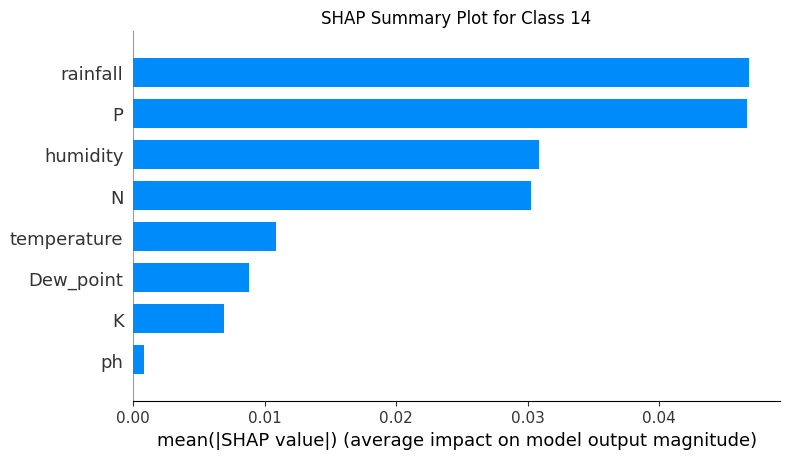

Class 16 SHAP values shape: (2200, 8)


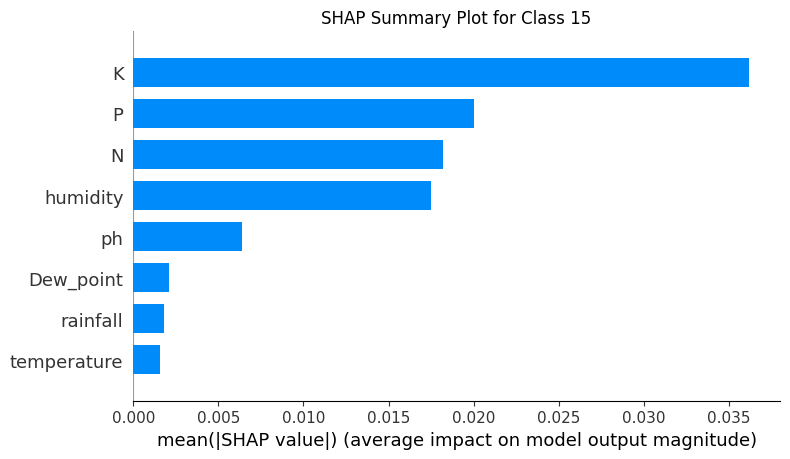

Class 17 SHAP values shape: (2200, 8)


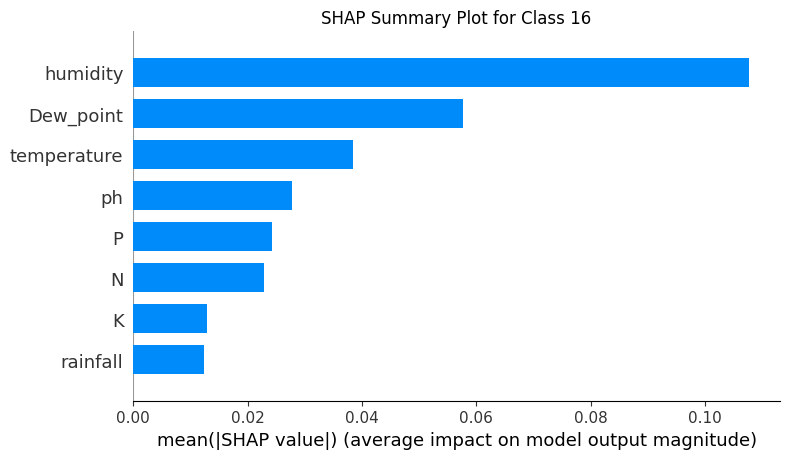

Class 18 SHAP values shape: (2200, 8)


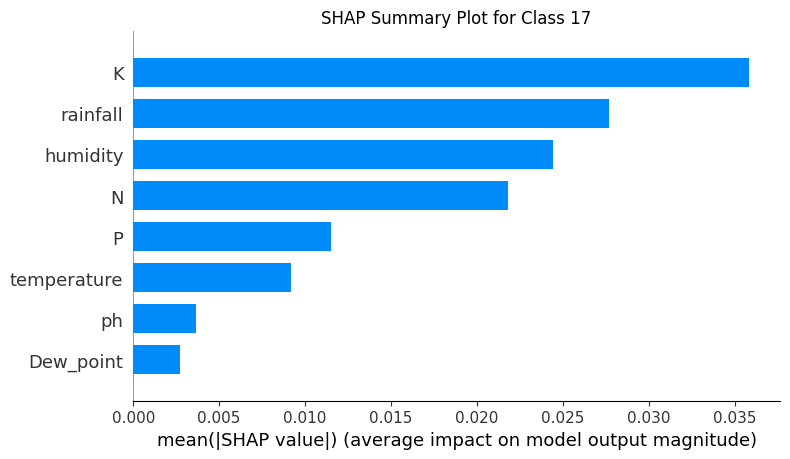

Class 19 SHAP values shape: (2200, 8)


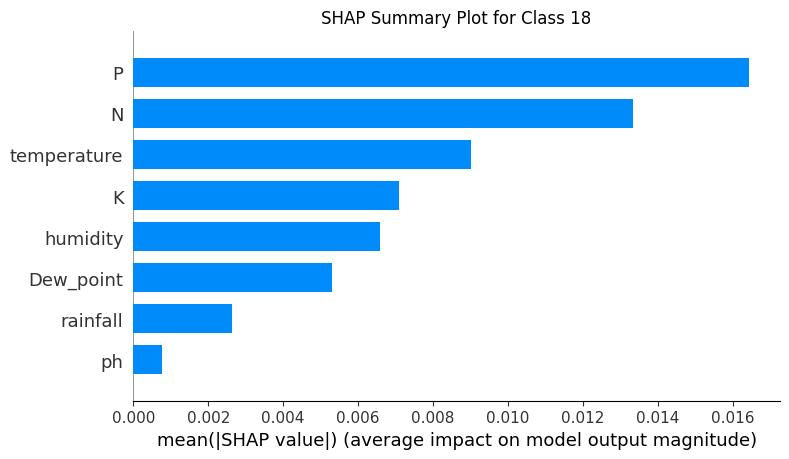

Class 20 SHAP values shape: (2200, 8)


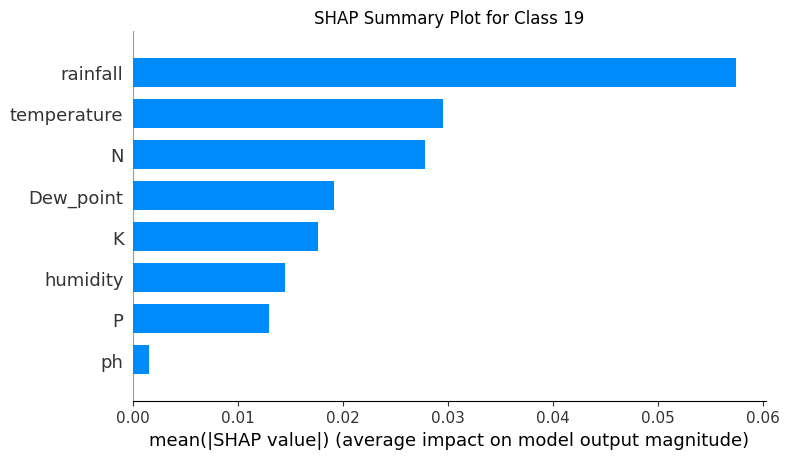

Class 21 SHAP values shape: (2200, 8)


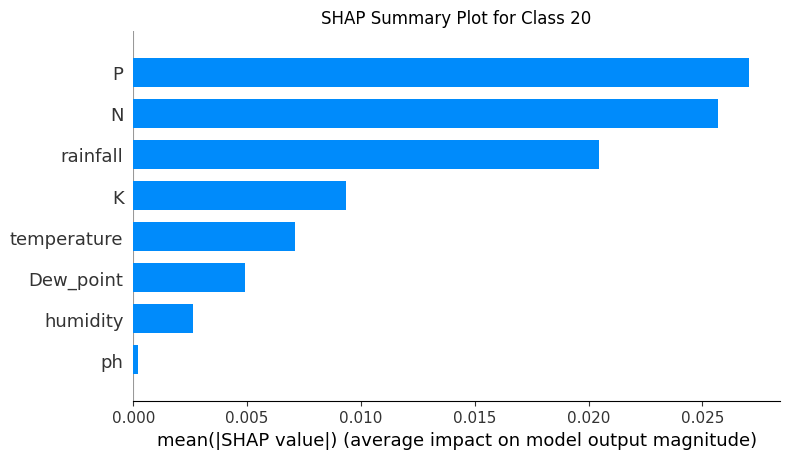

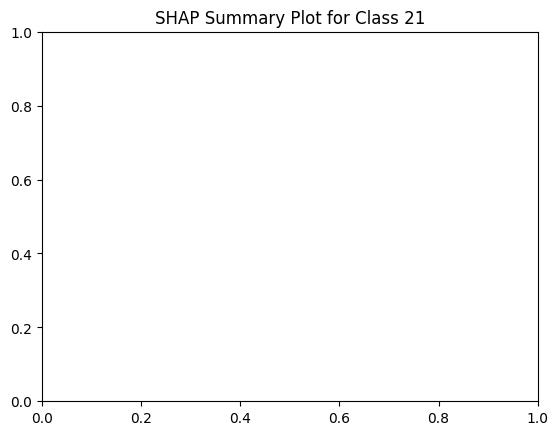

In [21]:

num_samples, num_features, num_classes = shap_values.shape

# Verify the shape of shap_values
print(f"SHAP values shape: {shap_values.shape}")

# Iterate over each class
for class_idx in range(num_classes):
    # Extract SHAP values for the current class
    class_shap_values = shap_values[:, :, class_idx]

    # Verify the shape of the extracted SHAP values
    print(f"Class {class_idx} SHAP values shape: {class_shap_values.shape}")

    # Create a SHAP summary plot for the current class
    shap.summary_plot(class_shap_values, X, plot_type="bar")
    plt.title(f'SHAP Summary Plot for Class {class_idx}')
    plt.savefig(f'shap_summary_plot_class_{class_idx}.png')



In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        30
      banana       1.00      1.00      1.00        22
   blackgram       1.00      1.00      1.00        28
    chickpea       1.00      1.00      1.00        25
     coconut       1.00      1.00      1.00        25
      coffee       1.00      1.00      1.00        19
      cotton       0.97      1.00      0.98        28
      grapes       1.00      1.00      1.00        26
        jute       1.00      0.93      0.97        30
 kidneybeans       1.00      1.00      1.00        32
      lentil       1.00      1.00      1.00        22
       maize       1.00      0.96      0.98        25
       mango       1.00      1.00      1.00        21
   mothbeans       1.00      1.00      1.00        26
    mungbean       1.00      1.00      1.00        21
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        26
      papaya       1.00    

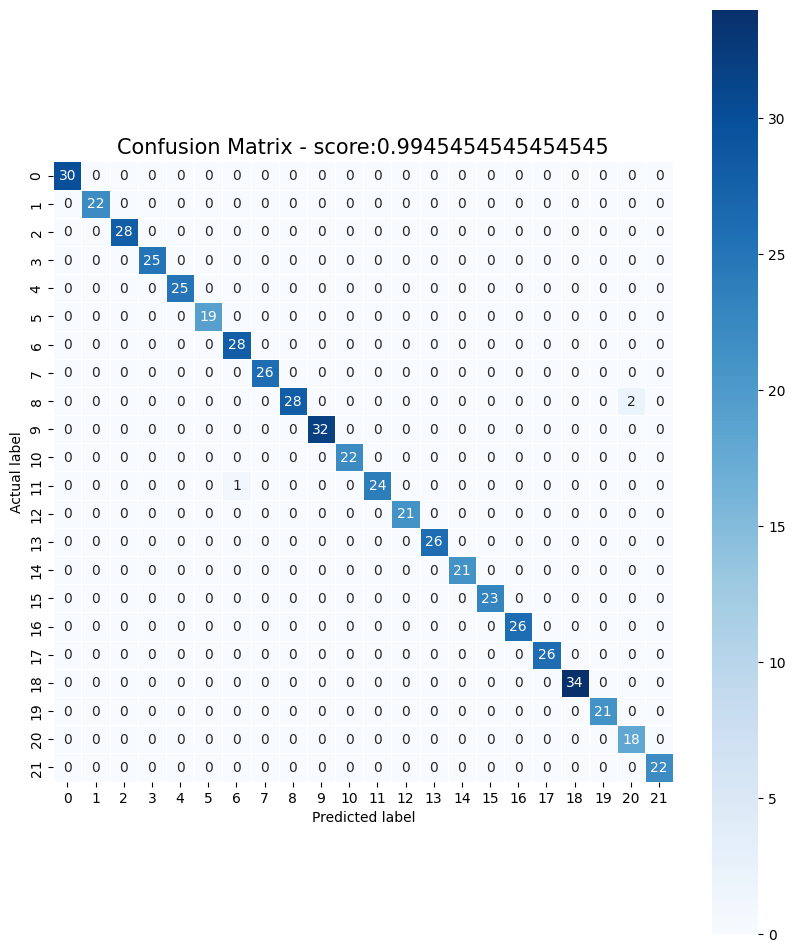

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,12))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()

In [26]:
joblib.dump(rf,"/content/drive/MyDrive/cr_model.pkl")

['/content/drive/MyDrive/cr_model.pkl']